# ラビットチャレンジ/深層学習day2/Section1:勾配消失問題
## 100文字以上の要点まとめ

・勾配消失問題  
 誤差逆伝播法が下位層に進んでいくにつれて、勾配がどんどん緩やかになっていく。そのため、勾配降下法による、更新では下位層のパラメータはほとんど変わらず、訓練は最適解に収束しなくなる。  
 連鎖率を用いて微分値がかけられていくと、その値は0以上1以下の範囲であるため、勾配は小さくなっていく。  
 
 シグモイド関数を微分した関数  
$$
y' = \displaystyle{\frac{e^{-u}}{(1+e^{-u})^2}}
$$ 
 
これの最大値は$u=0$で0.25であり、更に微分同士を掛け合わせると0に近づいていく。  
 
 勾配消失問題の解決方法は3つあり、活性化関数の選択、重みの初期設定、バッチ正規化を工夫することである。    
1.活性化関数の選択についてはRelu関数に変える。  
2.重みの初期値設定方法として、Xavierがある。重みの要素を、前の層のノード数の平方根で除算した値で初期値を設定する。    
 また、他にもHeがある。重みの要素を、前のノード数の平方根で除算した値に対し$\sqrt{2}$を掛け合わせた値を初期値とする。  
 活性化関数の表現力を保ったまま、勾配消失の対策ができる。  
3.バッチ正規化：ミニバッチ単位で、入力値のデータの偏りを抑制する手法。使い所は活性化関数に値を渡す前後に、バッチ正規化の処理を孕んだ層を加える。  

## 実装演習

In [1]:
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt


In [2]:
class ThreeLayerNet:
    '''
    input_size: 入力層のノード数
    hidden_size: 隠れ層のノード数
    output_size: 出力層のノード数
    weight_init_std: 重みの初期化方法
    '''
    def __init__(self, input_size, hidden1_size,hidden2_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden1_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden1_size, hidden2_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden2_size, output_size)
        self.params['b1'] = np.zeros(hidden1_size)
        self.params['b2'] = np.zeros(hidden2_size)
        self.params['b3'] = np.zeros(output_size)
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = layers.Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = layers.Sigmoid()
        self.layers['Affine2'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Sigmoid2'] = layers.Sigmoid()
        self.layers['Affine3'] = layers.Affine(self.params['W3'], self.params['b3'])
        
        self.lastLayer = layers.SoftmaxWithLoss()
        
    # 順伝播
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # 誤差
    def loss(self, x, d):
        y = self.predict(x)
        return self.lastLayer.forward(y, d)
    
    # 精度
    def accuracy(self, x, d):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        accuracy = np.sum(y == d) / float(x.shape[0])
        return accuracy
             
    # 勾配
    def gradient(self, x, d):
        # forward

        self.loss(x, d)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W2'], grad['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grad['W3'], grad['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db


        return grad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.0974
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.098
Generation: 30. 正答率(トレーニング) = 0.07
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.07
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.14
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.08
                : 70. 正答率(テスト) = 0.1032
Generation: 80. 正答率(トレーニング) = 0.12
                : 80. 正答率(テスト) = 0.101
Generation: 90. 正答率(トレーニング) = 0.17
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.11
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.11
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.12
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.1
                : 130. 正答率(テスト) = 0.1135
Generation

Generation: 1100. 正答率(トレーニング) = 0.19
                : 1100. 正答率(テスト) = 0.1135
Generation: 1110. 正答率(トレーニング) = 0.08
                : 1110. 正答率(テスト) = 0.1135
Generation: 1120. 正答率(トレーニング) = 0.13
                : 1120. 正答率(テスト) = 0.1135
Generation: 1130. 正答率(トレーニング) = 0.1
                : 1130. 正答率(テスト) = 0.1135
Generation: 1140. 正答率(トレーニング) = 0.12
                : 1140. 正答率(テスト) = 0.1135
Generation: 1150. 正答率(トレーニング) = 0.13
                : 1150. 正答率(テスト) = 0.1135
Generation: 1160. 正答率(トレーニング) = 0.11
                : 1160. 正答率(テスト) = 0.1135
Generation: 1170. 正答率(トレーニング) = 0.12
                : 1170. 正答率(テスト) = 0.1135
Generation: 1180. 正答率(トレーニング) = 0.13
                : 1180. 正答率(テスト) = 0.1135
Generation: 1190. 正答率(トレーニング) = 0.13
                : 1190. 正答率(テスト) = 0.1135
Generation: 1200. 正答率(トレーニング) = 0.06
                : 1200. 正答率(テスト) = 0.1135
Generation: 1210. 正答率(トレーニング) = 0.15
                : 1210. 正答率(テスト) = 0.1135
Generation: 1220. 正答率(トレーニング) = 0.13
                

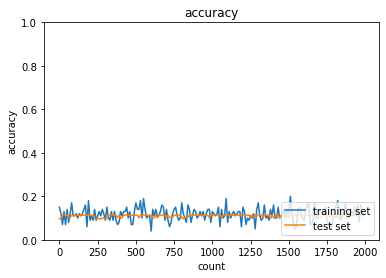

In [3]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = ThreeLayerNet(input_size=784, hidden1_size=40,hidden2_size=20, output_size=10)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    #バッチ取得
    batch_mask = np.random.choice(train_size, batch_size)
    #ミニバッチに対応する訓練データを取得
    x_batch = x_train[batch_mask]
    #ミニバッチに対応する正解ラベルを取得　
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2','W3', 'b1', 'b2','b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

In [4]:
class ThreeLayerNet:
    '''
    input_size: 入力層のノード数
    hidden_size: 隠れ層のノード数
    output_size: 出力層のノード数
    weight_init_std: 重みの初期化方法
    '''
    def __init__(self, input_size, hidden1_size,hidden2_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden1_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden1_size, hidden2_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden2_size, output_size)
        self.params['b1'] = np.zeros(hidden1_size)
        self.params['b2'] = np.zeros(hidden2_size)
        self.params['b3'] = np.zeros(output_size)
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = layers.Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine3'] = layers.Affine(self.params['W3'], self.params['b3'])
        
        self.lastLayer = layers.SoftmaxWithLoss()
        
    # 順伝播
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # 誤差
    def loss(self, x, d):
        y = self.predict(x)
        return self.lastLayer.forward(y, d)
    
    # 精度
    def accuracy(self, x, d):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        accuracy = np.sum(y == d) / float(x.shape[0])
        return accuracy
             
    # 勾配
    def gradient(self, x, d):
        # forward

        self.loss(x, d)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W2'], grad['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grad['W3'], grad['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db


        return grad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.1
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.12
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.12
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.14
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.09
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.14
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.1
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.08
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.12
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.06
                : 130. 正答率(テスト) = 0.1135
Generatio

Generation: 1120. 正答率(トレーニング) = 0.79
                : 1120. 正答率(テスト) = 0.8034
Generation: 1130. 正答率(トレーニング) = 0.83
                : 1130. 正答率(テスト) = 0.8107
Generation: 1140. 正答率(トレーニング) = 0.86
                : 1140. 正答率(テスト) = 0.8056
Generation: 1150. 正答率(トレーニング) = 0.84
                : 1150. 正答率(テスト) = 0.8291
Generation: 1160. 正答率(トレーニング) = 0.78
                : 1160. 正答率(テスト) = 0.7892
Generation: 1170. 正答率(トレーニング) = 0.86
                : 1170. 正答率(テスト) = 0.8075
Generation: 1180. 正答率(トレーニング) = 0.78
                : 1180. 正答率(テスト) = 0.8393
Generation: 1190. 正答率(トレーニング) = 0.92
                : 1190. 正答率(テスト) = 0.8291
Generation: 1200. 正答率(トレーニング) = 0.84
                : 1200. 正答率(テスト) = 0.817
Generation: 1210. 正答率(トレーニング) = 0.9
                : 1210. 正答率(テスト) = 0.8239
Generation: 1220. 正答率(トレーニング) = 0.89
                : 1220. 正答率(テスト) = 0.8538
Generation: 1230. 正答率(トレーニング) = 0.87
                : 1230. 正答率(テスト) = 0.8442
Generation: 1240. 正答率(トレーニング) = 0.89
                :

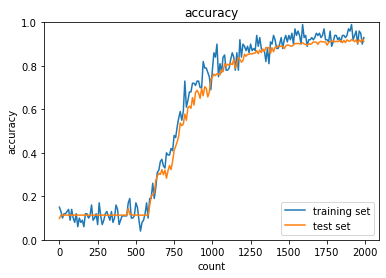

In [5]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = ThreeLayerNet(input_size=784, hidden1_size=40,hidden2_size=20, output_size=10)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2','W3', 'b1', 'b2','b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

1.入力値を「Affine1」に入れ、入力値と重みの総和を計算する。  
2.「Affine1」の出力を「Relu」に入れて活性化させる。(Sigmoidにも変更)  
3.「ReLU」の出力を「Affine2」に入れ、入力値と重みの総和を計算する。  
4.「Affine2」の出力を「Relu」に入れて活性化させる。(Sigmoidにも変更)  
5.「ReLU」の出力を「Affine3」に入れ、入力値と重みの総和を計算する。  
6.「Affine3」の出力を「Softmax_with_Loss」に入れ、活性化の結果/損失関数を求める。  
7.「Softmax_with_Loss」から「Affine3」に逆伝播(Affine3のパラメータを更新)  
8.「Affine3」から「Relu」に逆伝播  
9.「ReLU」から「Affine2」に逆伝播(Affine2のパラメータを更新)  
10.「Affine2」から「Relu」に逆伝播  
11.「ReLU」から「Affine1」に逆伝播(Affine1のパラメータを更新)  

Reluレイヤーとsigmoidレイヤーを誤差逆伝播法で比較してたところ、3層のニューラルネットワークでは中間層がsigmoidレイヤーの場合入力層付近の学習が進まず2000回勾配法による更新を行なっても正答率は低いままだった。Reluレイヤーは2000回で正答率90%以上となり学習が進んだ。勾配消失問題が確認できた。  

In [6]:
class ThreeLayerNet:
    '''
    input_size: 入力層のノード数
    hidden_size: 隠れ層のノード数
    output_size: 出力層のノード数
    '''
    def __init__(self, input_size, hidden1_size,hidden2_size, output_size):
        # Xavierの初期値
        # 重みの初期化
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden1_size)/(np.sqrt(input_size))
        self.params['W2'] = np.random.randn(hidden1_size, hidden2_size)/(np.sqrt(hidden1_size))
        self.params['W3'] = np.random.randn(hidden2_size, output_size)/(np.sqrt(hidden2_size))
        self.params['b1'] = np.zeros(hidden1_size)
        self.params['b2'] = np.zeros(hidden2_size)
        self.params['b3'] = np.zeros(output_size)
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = layers.Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine3'] = layers.Affine(self.params['W3'], self.params['b3'])
        
        self.lastLayer = layers.SoftmaxWithLoss()
        
    # 順伝播
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # 誤差
    def loss(self, x, d):
        y = self.predict(x)
        return self.lastLayer.forward(y, d)
    
    # 精度
    def accuracy(self, x, d):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        accuracy = np.sum(y == d) / float(x.shape[0])
        return accuracy
             
    # 勾配
    def gradient(self, x, d):
        # forward

        self.loss(x, d)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W2'], grad['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grad['W3'], grad['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db


        return grad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.33
                : 10. 正答率(テスト) = 0.2607
Generation: 20. 正答率(トレーニング) = 0.45
                : 20. 正答率(テスト) = 0.3915
Generation: 30. 正答率(トレーニング) = 0.57
                : 30. 正答率(テスト) = 0.5292
Generation: 40. 正答率(トレーニング) = 0.64
                : 40. 正答率(テスト) = 0.6647
Generation: 50. 正答率(トレーニング) = 0.77
                : 50. 正答率(テスト) = 0.7083
Generation: 60. 正答率(トレーニング) = 0.74
                : 60. 正答率(テスト) = 0.7306
Generation: 70. 正答率(トレーニング) = 0.89
                : 70. 正答率(テスト) = 0.8234
Generation: 80. 正答率(トレーニング) = 0.87
                : 80. 正答率(テスト) = 0.8441
Generation: 90. 正答率(トレーニング) = 0.89
                : 90. 正答率(テスト) = 0.8563
Generation: 100. 正答率(トレーニング) = 0.87
                : 100. 正答率(テスト) = 0.8561
Generation: 110. 正答率(トレーニング) = 0.9
                : 110. 正答率(テスト) = 0.8455
Generation: 120. 正答率(トレーニング) = 0.88
                : 120. 正答率(テスト) = 0.8533
Generation: 130. 正答率(トレーニング) = 0.89
                : 130. 正答率(テスト) = 0.8705
Generati

Generation: 1100. 正答率(トレーニング) = 0.98
                : 1100. 正答率(テスト) = 0.9413
Generation: 1110. 正答率(トレーニング) = 0.98
                : 1110. 正答率(テスト) = 0.9422
Generation: 1120. 正答率(トレーニング) = 0.92
                : 1120. 正答率(テスト) = 0.9391
Generation: 1130. 正答率(トレーニング) = 0.99
                : 1130. 正答率(テスト) = 0.9371
Generation: 1140. 正答率(トレーニング) = 0.97
                : 1140. 正答率(テスト) = 0.9358
Generation: 1150. 正答率(トレーニング) = 0.99
                : 1150. 正答率(テスト) = 0.9373
Generation: 1160. 正答率(トレーニング) = 0.94
                : 1160. 正答率(テスト) = 0.9374
Generation: 1170. 正答率(トレーニング) = 0.95
                : 1170. 正答率(テスト) = 0.9402
Generation: 1180. 正答率(トレーニング) = 0.92
                : 1180. 正答率(テスト) = 0.9405
Generation: 1190. 正答率(トレーニング) = 0.98
                : 1190. 正答率(テスト) = 0.9423
Generation: 1200. 正答率(トレーニング) = 0.99
                : 1200. 正答率(テスト) = 0.9401
Generation: 1210. 正答率(トレーニング) = 0.94
                : 1210. 正答率(テスト) = 0.9369
Generation: 1220. 正答率(トレーニング) = 0.97
               

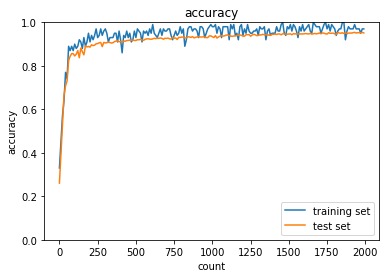

In [7]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = ThreeLayerNet(input_size=784, hidden1_size=40,hidden2_size=20, output_size=10)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2','W3', 'b1', 'b2','b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

Xavierはすごかった。たった400回程度のイテレーションで正答率97%近くまで学習が進んだ。

## 確認テスト

連鎖率の原理を使い、$\displaystyle{\dfrac{dz}{dx} }$を求めよ。
$$
z = t^2
$$
$$
t = x + y
$$

$$
\dfrac{dz}{dt} = 2t
$$

$$
\dfrac{dt}{dx} = 1
$$

$$
\dfrac{dz}{dx} = \dfrac{dz}{dt}\dfrac{dt}{dx} = 2t \times 1 = 2t = 2(x+y)
$$

## 確認テスト

シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。

 シグモイド関数を微分した関数  
$$
y' = \displaystyle{\frac{e^{-u}}{(1+e^{-u})^2}}
$$ 

$u=0$の時
$$
y'=\displaystyle{\frac{e^{0}}{(1+e^{0})^2}}
$$
(2) 0.25

## 確認テスト

重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。

解）重みの初期値を0に設定すると、重みがすべて同じ値で更新され学習が進まなくなる。

## 確認テスト

一般的に考えられるバッチ正規化の効果を2点挙げよ。  

1.中間層の重みの更新が安定し、学習速度が速くなる。  
2.過学習が抑制できる。  

# ラビットチャレンジ/深層学習day2/Section2:学習率最適化手法
## 100文字以上の要点まとめ

学習率の値が大きすぎると、最適値にたどり着けずに発散してしまう、対して値が小さすぎると、収束するまでに時間がかかる。  

この問題点を解決するために、  
・初期の学習率を大きく設定し、徐々に学習率を小さくしていく。  
・パラメータごとに学習率を可変させる。  
これらの、学習率最適化手法を利用して学習率を最適化させる。  


代表的な最適化手法として、モメンタム、AdaGrad、RMSProp、Adam等がある。


・モメンタム

$V_t = uV_{t-1}-\epsilon \nabla E$  
$W^{(t+1)} = W^{(t)}+V_t$  
慣性：$u$  


モメンタムのメリット  
・局所的最適解にならず、大域的最適解となる。  
・谷間についてから最も低い位置(最適値)にいくまでの時間が早い。  


・AdaGrad  

$h_0 = \theta$  
$h_t = h_{t-1}+(\nabla E)^2$  
$W^{(t+1)} = W^{(t)}-\epsilon \frac{1}{\sqrt{h_t}+\theta}  \nabla E$  


AdaGradメリット  
・勾配の緩やかな斜面に対して、最適値に近づける。

AdaGradの課題
・学習率が徐々に小さくなるので、鞍点問題を引き起こす事があった。


・RMSProp  

$h_t = \alpha h_{t-1}+(1-\alpha)(\nabla E)^2$   
$W^{(t+1)} = W^{(t)}-\epsilon \frac{1}{\sqrt{h_t}+\theta}  \nabla E$ 


RMSPropのメリット  

・局所最適解にはならず、大域的最適解となる。  
・ハイパーパラメータの調整が必要な場合が少ない。  

・Adam  
モメンタムの過去の勾配の指数関数的減衰平均   
RMSPropの、過去の勾配の2乗の指数関数的減衰平均   
上記をそれぞれ孕んだ最適化アルゴリズムである。  

Adamのメリット   
・モメンタム及びRMSPropのメリットを孕んだアルゴリズムである。  

## 実装演習

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.1268
Generation: 20. 正答率(トレーニング) = 0.26
                : 20. 正答率(テスト) = 0.2012
Generation: 30. 正答率(トレーニング) = 0.23
                : 30. 正答率(テスト) = 0.3002
Generation: 40. 正答率(トレーニング) = 0.32
                : 40. 正答率(テスト) = 0.3352
Generation: 50. 正答率(トレーニング) = 0.28
                : 50. 正答率(テスト) = 0.3322
Generation: 60. 正答率(トレーニング) = 0.26
                : 60. 正答率(テスト) = 0.3201
Generation: 70. 正答率(トレーニング) = 0.29
                : 70. 正答率(テスト) = 0.3151
Generation: 80. 正答率(トレーニング) = 0.3
                : 80. 正答率(テスト) = 0.3113
Generation: 90. 正答率(トレーニング) = 0.39
                : 90. 正答率(テスト) = 0.3279
Generation: 100. 正答率(トレーニング) = 0.33
                : 100. 正答率(テスト) = 0.3285
Generation: 110. 正答率(トレーニング) = 0.38
                : 110. 正答率(テスト) = 0.3194
Generation: 120. 正答率(トレーニング) = 0.26
                : 120. 正答率(テスト) = 0.3322
Generation: 130. 正答率(トレーニング) = 0.32
                : 130. 正答率(テスト) = 0.3324
Generati

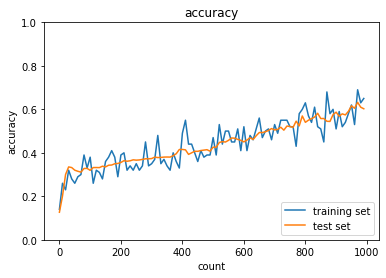

In [8]:
#SGD batch_normalization
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
#use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.19
                : 10. 正答率(テスト) = 0.1599
Generation: 20. 正答率(トレーニング) = 0.21
                : 20. 正答率(テスト) = 0.2705
Generation: 30. 正答率(トレーニング) = 0.49
                : 30. 正答率(テスト) = 0.518
Generation: 40. 正答率(トレーニング) = 0.43
                : 40. 正答率(テスト) = 0.436
Generation: 50. 正答率(トレーニング) = 0.41
                : 50. 正答率(テスト) = 0.3878
Generation: 60. 正答率(トレーニング) = 0.45
                : 60. 正答率(テスト) = 0.3615
Generation: 70. 正答率(トレーニング) = 0.42
                : 70. 正答率(テスト) = 0.4429
Generation: 80. 正答率(トレーニング) = 0.5
                : 80. 正答率(テスト) = 0.5108
Generation: 90. 正答率(トレーニング) = 0.62
                : 90. 正答率(テスト) = 0.598
Generation: 100. 正答率(トレーニング) = 0.64
                : 100. 正答率(テスト) = 0.6376
Generation: 110. 正答率(トレーニング) = 0.73
                : 110. 正答率(テスト) = 0.6374
Generation: 120. 正答率(トレーニング) = 0.6
                : 120. 正答率(テスト) = 0.6435
Generation: 130. 正答率(トレーニング) = 0.7
                : 130. 正答率(テスト) = 0.6698
Generation: 1

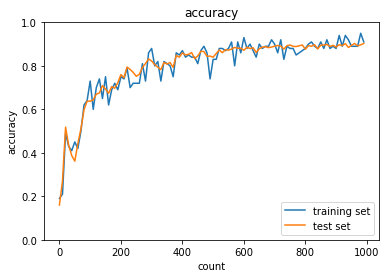

In [9]:
# モメンタム
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.1028
Generation: 30. 正答率(トレーニング) = 0.08
                : 30. 正答率(テスト) = 0.1028
Generation: 40. 正答率(トレーニング) = 0.06
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.12
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.15
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.15
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.06
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.11
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.11
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.11
                : 120. 正答率(テスト) = 0.101
Generation: 130. 正答率(トレーニング) = 0.09
                : 130. 正答率(テスト) = 0.101
Generatio

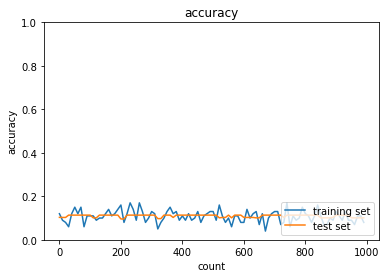

In [10]:
# AdaGrad
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.0974
Generation: 20. 正答率(トレーニング) = 0.16
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.14
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.23
                : 40. 正答率(テスト) = 0.2079
Generation: 50. 正答率(トレーニング) = 0.23
                : 50. 正答率(テスト) = 0.2109
Generation: 60. 正答率(トレーニング) = 0.22
                : 60. 正答率(テスト) = 0.212
Generation: 70. 正答率(トレーニング) = 0.27
                : 70. 正答率(テスト) = 0.2458
Generation: 80. 正答率(トレーニング) = 0.27
                : 80. 正答率(テスト) = 0.2311
Generation: 90. 正答率(トレーニング) = 0.39
                : 90. 正答率(テスト) = 0.3095
Generation: 100. 正答率(トレーニング) = 0.33
                : 100. 正答率(テスト) = 0.3811
Generation: 110. 正答率(トレーニング) = 0.38
                : 110. 正答率(テスト) = 0.3727
Generation: 120. 正答率(トレーニング) = 0.39
                : 120. 正答率(テスト) = 0.3839
Generation: 130. 正答率(トレーニング) = 0.39
                : 130. 正答率(テスト) = 0.3997
Generati

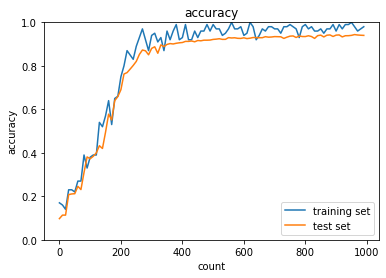

In [11]:
# RMSprop
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.1709
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.1148
Generation: 30. 正答率(トレーニング) = 0.23
                : 30. 正答率(テスト) = 0.1638
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1879
Generation: 50. 正答率(トレーニング) = 0.18
                : 50. 正答率(テスト) = 0.2066
Generation: 60. 正答率(トレーニング) = 0.21
                : 60. 正答率(テスト) = 0.2043
Generation: 70. 正答率(トレーニング) = 0.27
                : 70. 正答率(テスト) = 0.2542
Generation: 80. 正答率(トレーニング) = 0.28
                : 80. 正答率(テスト) = 0.2993
Generation: 90. 正答率(トレーニング) = 0.37
                : 90. 正答率(テスト) = 0.3001
Generation: 100. 正答率(トレーニング) = 0.27
                : 100. 正答率(テスト) = 0.3049
Generation: 110. 正答率(トレーニング) = 0.35
                : 110. 正答率(テスト) = 0.3047
Generation: 120. 正答率(トレーニング) = 0.44
                : 120. 正答率(テスト) = 0.3193
Generation: 130. 正答率(トレーニング) = 0.41
                : 130. 正答率(テスト) = 0.3742
Generat

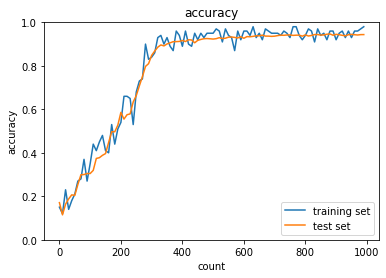

In [12]:
#Adam
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 確認テスト

モメンタム・・SGDの時と比べて$x$軸に早く近づくことができ、ジグザグに動きを軽減することができる。前回の勾配情報を用いて（移動平均を算出して）勾配を更新する。  
Adagrad・・パラメータの要素ごとに適応的に学習係数を調整しながら学習を行う手法。  
RMSProp・・勾配の大きさに応じて学習率を調整する。

# ラビットチャレンジ/深層学習day2/Section3:過学習
## 100文字以上の要点まとめ

過学習とはテスト誤差と訓練誤差とで学習曲線が乖離すること
-特定の訓練サンプルに対して、特化して学習する

原因  
・パラメータの数が多い  
・パラメータの値が適切でない  
・ノードが多いetc...  

-ネットワークの自由度（層数、ノード数、パラメータの値etc...)が高い

このための対策として正規化とドロップアウトがある。

正規化とはパラメータへの介入である。
ネットワークの自由度（層数、ノード数、パラメータの値etc...)を制約すること
-正規化手法を利用して過学習を抑制する(L1正規化、L2正規化)

・過学習の原因  
　重みが大きい値をとることで、過学習が発生することがある。  
 -学習させていくと、重みにばらつきが発生する。重みが大きい値は、学習において重要な値であり、重みが大きいと過学習が起こる。  
 
・過学習の解決策  
　誤差に対して、正規化項を加算することで、重みを抑制  
 -過学習がおこりそうな重みの大きさ以下で重みをコントロールし、かつ重みの大きさにはばらつきを出す必要がある。  
 
ドロップアウトとはノード数への介入である  
・ランダムにノードを削除して学習させること

メリットとして  
・データ量を変化させずに、異なるモデルを学習させていると解釈できる。  

## 実装演習

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11666666666666667
                : 10. 正答率(テスト) = 0.1188
Generation: 20. 正答率(トレーニング) = 0.21333333333333335
                : 20. 正答率(テスト) = 0.1745
Generation: 30. 正答率(トレーニング) = 0.32
                : 30. 正答率(テスト) = 0.2323
Generation: 40. 正答率(トレーニング) = 0.43333333333333335
                : 40. 正答率(テスト) = 0.2967
Generation: 50. 正答率(トレーニング) = 0.5333333333333333
                : 50. 正答率(テスト) = 0.3629
Generation: 60. 正答率(トレーニング) = 0.5966666666666667
                : 60. 正答率(テスト) = 0.4179
Generation: 70. 正答率(トレーニング) = 0.6233333333333333
                : 70. 正答率(テスト) = 0.4396
Generation: 80. 正答率(トレーニング) = 0.67
                : 80. 正答率(テスト) = 0.4903
Generation: 90. 正答率(トレーニング) = 0.7366666666666667
                : 90. 正答率(テスト) = 0.5439
Generation: 100. 正答率(トレーニング) = 0.7633333333333333
                : 100. 正答率(テスト) = 0.5605
Generation: 110. 正答率(トレーニング) = 0.7866666666666666
                : 110. 正答率(テスト) = 0.588
Generation: 120. 正答率(トレーニング) = 0.

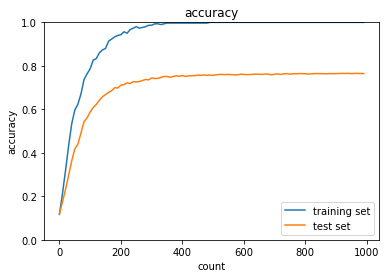

In [12]:
# 過学習
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.20666666666666667
                : 10. 正答率(テスト) = 0.1433
Generation: 20. 正答率(トレーニング) = 0.23333333333333334
                : 20. 正答率(テスト) = 0.1697
Generation: 30. 正答率(トレーニング) = 0.29333333333333333
                : 30. 正答率(テスト) = 0.2035
Generation: 40. 正答率(トレーニング) = 0.30333333333333334
                : 40. 正答率(テスト) = 0.2276
Generation: 50. 正答率(トレーニング) = 0.33
                : 50. 正答率(テスト) = 0.2522
Generation: 60. 正答率(トレーニング) = 0.3233333333333333
                : 60. 正答率(テスト) = 0.2603
Generation: 70. 正答率(トレーニング) = 0.38333333333333336
                : 70. 正答率(テスト) = 0.2939
Generation: 80. 正答率(トレーニング) = 0.3933333333333333
                : 80. 正答率(テスト) = 0.3085
Generation: 90. 正答率(トレーニング) = 0.4166666666666667
                : 90. 正答率(テスト) = 0.3228
Generation: 100. 正答率(トレーニング) = 0.4666666666666667
                : 100. 正答率(テスト) = 0.3626
Generation: 110. 正答率(トレーニング) = 0.5333333333333333
                : 110. 正答率(テスト) = 0.3959
Generation: 120.

Generation: 970. 正答率(トレーニング) = 0.9066666666666666
                : 970. 正答率(テスト) = 0.7539
Generation: 980. 正答率(トレーニング) = 0.9033333333333333
                : 980. 正答率(テスト) = 0.7476
Generation: 990. 正答率(トレーニング) = 0.9066666666666666
                : 990. 正答率(テスト) = 0.7499
Generation: 1000. 正答率(トレーニング) = 0.91
                : 1000. 正答率(テスト) = 0.7585


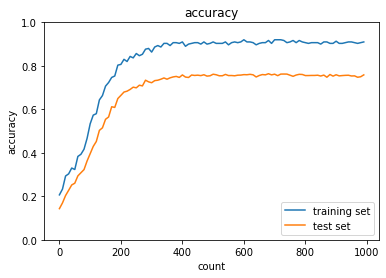

In [13]:
# weight Decay 荷重減衰
# L2正則化
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5166666666666667
                : 10. 正答率(テスト) = 0.3735
Generation: 20. 正答率(トレーニング) = 0.38
                : 20. 正答率(テスト) = 0.3042
Generation: 30. 正答率(トレーニング) = 0.74
                : 30. 正答率(テスト) = 0.6317
Generation: 40. 正答率(トレーニング) = 0.7633333333333333
                : 40. 正答率(テスト) = 0.5999
Generation: 50. 正答率(トレーニング) = 0.49666666666666665
                : 50. 正答率(テスト) = 0.4127
Generation: 60. 正答率(トレーニング) = 0.7666666666666667
                : 60. 正答率(テスト) = 0.5934
Generation: 70. 正答率(トレーニング) = 0.82
                : 70. 正答率(テスト) = 0.6914
Generation: 80. 正答率(トレーニング) = 0.93
                : 80. 正答率(テスト) = 0.7717
Generation: 90. 正答率(トレーニング) = 0.7066666666666667
                : 90. 正答率(テスト) = 0.5283
Generation: 100. 正答率(トレーニング) = 0.89
                : 100. 正答率(テスト) = 0.6918
Generation: 110. 正答率(トレーニング) = 0.9133333333333333
                : 110. 正答率(テスト) = 0.7424
Generation: 120. 正答率(トレーニング) = 0.92
                : 120. 正答率(テスト) = 0.7408

Generation: 970. 正答率(トレーニング) = 0.9866666666666667
                : 970. 正答率(テスト) = 0.7601
Generation: 980. 正答率(トレーニング) = 0.9833333333333333
                : 980. 正答率(テスト) = 0.7528
Generation: 990. 正答率(トレーニング) = 0.9833333333333333
                : 990. 正答率(テスト) = 0.7452
Generation: 1000. 正答率(トレーニング) = 0.9266666666666666
                : 1000. 正答率(テスト) = 0.7158


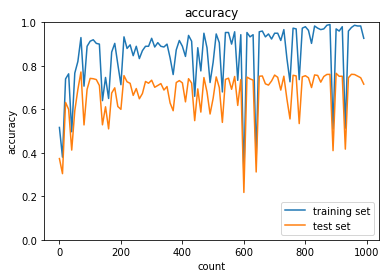

In [14]:
# weight Decay 荷重減衰
# L1正則化

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

In [15]:
# Dropout
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0723
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.0836
Generation: 30. 正答率(トレーニング) = 0.10666666666666667
                : 30. 正答率(テスト) = 0.0903
Generation: 40. 正答率(トレーニング) = 0.12666666666666668
                : 40. 正答率(テスト) = 0.0991
Generation: 50. 正答率(トレーニング) = 0.12666666666666668
                : 50. 正答率(テスト) = 0.1072
Generation: 60. 正答率(トレーニング) = 0.15
                : 60. 正答率(テスト) = 0.1177
Generation: 70. 正答率(トレーニング) = 0.16666666666666666
                : 70. 正答率(テスト) = 0.1288
Generation: 80. 正答率(トレーニング) = 0.20333333333333334
                : 80. 正答率(テスト) = 0.1552
Generation: 90. 正答率(トレーニング) = 0.22
                : 90. 正答率(テスト) = 0.1746
Generation: 100. 正答率(トレーニング) = 0.25333333333333335
                : 100. 正答率(テスト) = 0.1926
Generation: 110. 正答率(トレーニング) = 0.29
                : 110. 正答率(テスト) = 0.2225
Generation: 120. 正答率(トレーニング) = 0.2866666666666667
                : 120.

Generation: 960. 正答率(トレーニング) = 0.9333333333333333
                : 960. 正答率(テスト) = 0.7114
Generation: 970. 正答率(トレーニング) = 0.9366666666666666
                : 970. 正答率(テスト) = 0.7096
Generation: 980. 正答率(トレーニング) = 0.94
                : 980. 正答率(テスト) = 0.7119
Generation: 990. 正答率(トレーニング) = 0.9333333333333333
                : 990. 正答率(テスト) = 0.7083
Generation: 1000. 正答率(トレーニング) = 0.9433333333333334
                : 1000. 正答率(テスト) = 0.7151


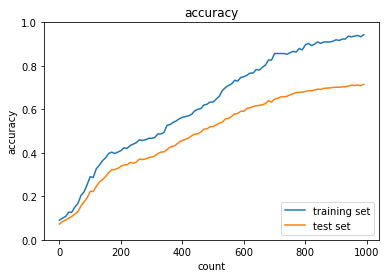

In [19]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.0831
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.0972
Generation: 30. 正答率(トレーニング) = 0.12666666666666668
                : 30. 正答率(テスト) = 0.1162
Generation: 40. 正答率(トレーニング) = 0.16
                : 40. 正答率(テスト) = 0.1359
Generation: 50. 正答率(トレーニング) = 0.19
                : 50. 正答率(テスト) = 0.1537
Generation: 60. 正答率(トレーニング) = 0.27
                : 60. 正答率(テスト) = 0.1729
Generation: 70. 正答率(トレーニング) = 0.2866666666666667
                : 70. 正答率(テスト) = 0.1944
Generation: 80. 正答率(トレーニング) = 0.31666666666666665
                : 80. 正答率(テスト) = 0.2232
Generation: 90. 正答率(トレーニング) = 0.35333333333333333
                : 90. 正答率(テスト) = 0.2496
Generation: 100. 正答率(トレーニング) = 0.38666666666666666
                : 100. 正答率(テスト) = 0.2729
Generation: 110. 正答率(トレーニング) = 0.4166666666666667
                : 110. 正答率(テスト) = 0.3064
Generation: 120. 正答率(トレーニング) = 0.43666666666666665
                : 120. 

Generation: 970. 正答率(トレーニング) = 0.9066666666666666
                : 970. 正答率(テスト) = 0.7246
Generation: 980. 正答率(トレーニング) = 0.9
                : 980. 正答率(テスト) = 0.7267
Generation: 990. 正答率(トレーニング) = 0.9033333333333333
                : 990. 正答率(テスト) = 0.7254
Generation: 1000. 正答率(トレーニング) = 0.91
                : 1000. 正答率(テスト) = 0.7245


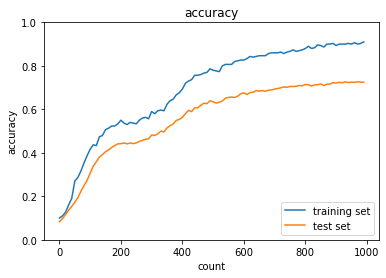

In [20]:
# Dropout+L1 

from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 確認テスト 

　機械学習で使われる線形モデル（線形回帰、主成分分析…etc）の正規化は、モデルの重みを制限することで可能となる。前述の線形モデルの正規化手法の中にリッジ回帰という手法があり、その特徴として正しいものを選択しなさい。  

(a)ハイパーパラメータを大きな値に設定すると、全ての重みが限りなく０に近づく  
(b)ハイパーパラメータを０に設定すると、非線形回帰となる。  
(c)バイアス項についても、正則化される  
(d)リッジ回帰の場合、隠れ層に対して正則化項を加える  

解答  
正(a)  
誤(b)ハイパーパラメータを０に設定すると、線形回帰になる  
誤(c)バイアス項は正則化されない  
誤(d)隠れ層ではなく、損失関数に適応される  

下図について、L1正則化を表しているグラフはどちらか答えよ。

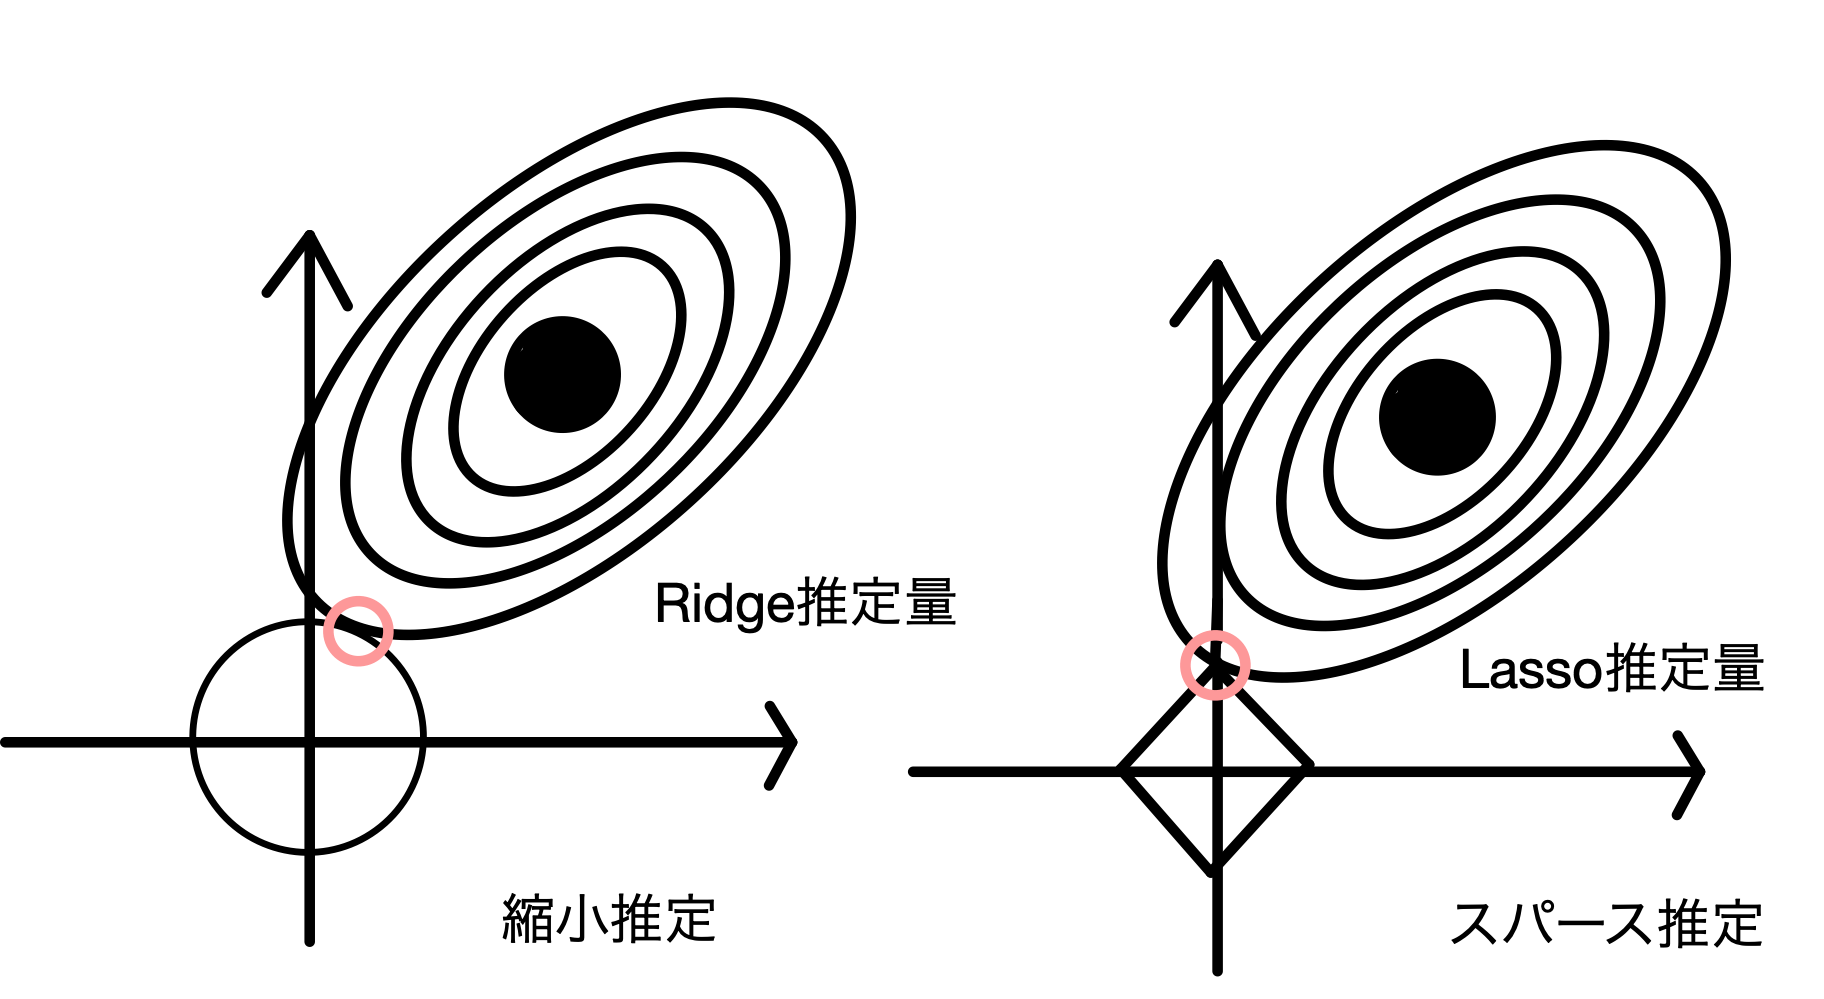


右側がL1正則化

# ラビットチャレンジ/深層学習day2/
# Section4:畳み込みニューラルネットワークの概念
## 100文字以上の要点まとめ

　畳み込みニューラルネットワーク（Convolutional Neural Network:CNN）とは、「畳み込み層」と「プーリング層」を含む幾つかの特徴的な機能を持った層を有し、画像認識や音声認識など優れた性能を発揮しているネットワークである。多層パーセプトロンと比較し、計算量が少ないため何段もの深い層にすることが可能である。基本構造として、入力層から、畳み込み層-プーリング層をいくつか繰り返した後、全結合層(Affine)につないで、出力層となっている。  

・畳み込み層  
　畳み込み演算を行う層  

　畳み込み演算は、入力データからフィルターと同サイズの領域を切り出してフィルタに通し、バイアスを加える操作のことをいう。このフィルターをストライド分だけスライドさせて順番に計算させることで、フィルターを適応した領域の特徴を抽出する。この計算過程で得られたデータは特徴マップと呼ばれる。画像の例では、サイズ（縦と横）とチャンネル(RGB)の3次元のデータとなるが、全結合層では、これらを1次元のデータとして扱うためRGBの各チャンネル間の関連性が、学習に反映されないが、畳み込み層では、3次元データとして次元間のつながりを保ったまま、次に伝えることができるため、3次元の空間情報を学習できると解釈される。畳み込み層で使用されるパラメータは以下の通りである。

・フィルター(カーネル)：入力データに適応させる重みのこと。チャネルは入力層と同じにする。


4-1-1　バイアス  
 フィルターを適応させた後に加算する。サイズは常に1 x 1  
 
4-1-2　パディング
　入力データの周囲に固定のデータ(たとえば0など)を埋める処理のことで、出力サイズを調整する役割がある。  

4-1-3　ストライド
　フィルタを適用する位置の間隔のことで、大きくすることで出力サイズを小さくすることができる。
 
4-1-4　チャンネル
　画像の場合、縦、横方向に加えてチャンネル方向こ合わせた３次元データを扱う必要がある。

4-2
　プーリング層：入力データのサイズ（画像の場合、縦と横）を小さくする処理を行う層で、領域の最大値を取得するMax poolingや平均値を取得するAverage poolingなどがある。特徴として、最大値(または平均値)をとるだけなので学習するパラメータがないことと、画像の場合、サイズ(縦と横)のみに適応するのでチャネル数は変わらない。領域で処理を行うので平行移動(ズレ)などでも影響を受けないロバスト性を与える役割を果たす。
 
・畳み込み演算 
　3次元データを多次元配列として表すときは(channel,height,width)の順に並べて書くものとする。たとえば、チャンネル数C,高さH,横幅Wのデータの形状は(C,H,W)と書ける。  
　入力データ(C,H,W)にFN個のフィルター(C,FH,FW)をストライドS,パディングPで適応させた場合,出力データ(FN,OH,OW)は、

$ OH = \frac{H+2P-FH}{S} + 1 $  

$ OW = \frac{W+2P-FW}{S} + 1 $  

$ OC = FN $

 

## 実装演習

In [1]:
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt

# 画像データを２次元配列に変換
'''
input_data: 入力値
filter_h: フィルターの高さ
filter_w: フィルターの横幅
stride: ストライド
pad: パディング
'''
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
    
    col = col.transpose(0, 4, 5, 1, 2, 3) # (N, C, filter_h, filter_w, out_h, out_w) -> (N, filter_w, out_h, out_w, C, filter_h)    
    
    col = col.reshape(N * out_h * out_w, -1)
    return col

In [22]:
# im2colの処理確認
input_data = np.random.rand(2, 1, 4, 4)*100//1 # number, channel, height, widthを表す
print('========== input_data ===========\n', input_data)
print('==============================')
filter_h = 3
filter_w = 3
stride = 1
pad = 0
col = im2col(input_data, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print('============= col ==============\n', col)
print('==============================')

========== input_data ===========
 [[[[95. 31. 52.  1.]
   [19. 37. 30. 61.]
   [ 6. 66.  4. 64.]
   [61. 40. 82. 92.]]]


 [[[81. 90. 14. 97.]
   [63. 12. 16. 27.]
   [33. 42. 61. 84.]
   [82. 97. 43. 91.]]]]
============= col ==============
 [[95. 31. 52. 19. 37. 30.  6. 66.  4.]
 [31. 52.  1. 37. 30. 61. 66.  4. 64.]
 [19. 37. 30.  6. 66.  4. 61. 40. 82.]
 [37. 30. 61. 66.  4. 64. 40. 82. 92.]
 [81. 90. 14. 63. 12. 16. 33. 42. 61.]
 [90. 14. 97. 12. 16. 27. 42. 61. 84.]
 [63. 12. 16. 33. 42. 61. 82. 97. 43.]
 [12. 16. 27. 42. 61. 84. 97. 43. 91.]]


In [24]:
# ２次元配列を画像データに変換
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_shape
    # 切り捨て除算    
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2) # (N, filter_h, filter_w, out_h, out_w, C)

    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

# ここにcol2imでの処理を書こう
img = col2im(col, input_shape=input_data.shape, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print(img)

[[[[ 95.  62. 104.   1.]
   [ 38. 148. 120. 122.]
   [ 12. 264.  16. 128.]
   [ 61.  80. 164.  92.]]]


 [[[ 81. 180.  28.  97.]
   [126.  48.  64.  54.]
   [ 66. 168. 244. 168.]
   [ 82. 194.  86.  91.]]]]


In [25]:
class Convolution:
    # W: フィルター, b: バイアス
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # フィルター・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        # FN: filter_number, C: channel, FH: filter_height, FW: filter_width
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        # 出力値のheight, width
        out_h = 1 + int((H + 2 * self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2 * self.pad - FW) / self.stride)
        
        # xを行列に変換
        col = im2col(x, FH, FW, self.stride, self.pad)
        # フィルターをxに合わせた行列に変換
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        # 計算のために変えた形式を戻す
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        # dcolを画像データに変換
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

In [26]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # xを行列に変換
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        # プーリングのサイズに合わせてリサイズ
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # 行ごとに最大値を求める
        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        # 整形
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

In [27]:
class SimpleConvNet:
    # conv - relu - pool - affine - relu - affine - softmax
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']        
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W3'], self.params['b3'])

        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        
        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W3'], grad['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.2734
                : 10. 正答率(テスト) = 0.309
Generation: 20. 正答率(トレーニング) = 0.6678
                : 20. 正答率(テスト) = 0.624
Generation: 30. 正答率(トレーニング) = 0.7516
                : 30. 正答率(テスト) = 0.71
Generation: 40. 正答率(トレーニング) = 0.8
                : 40. 正答率(テスト) = 0.767
Generation: 50. 正答率(トレーニング) = 0.8286
                : 50. 正答率(テスト) = 0.783
Generation: 60. 正答率(トレーニング) = 0.8374
                : 60. 正答率(テスト) = 0.805
Generation: 70. 正答率(トレーニング) = 0.8644
                : 70. 正答率(テスト) = 0.83
Generation: 80. 正答率(トレーニング) = 0.888
                : 80. 正答率(テスト) = 0.863
Generation: 90. 正答率(トレーニング) = 0.8932
                : 90. 正答率(テスト) = 0.85
Generation: 100. 正答率(トレーニング) = 0.8866
                : 100. 正答率(テスト) = 0.857
Generation: 110. 正答率(トレーニング) = 0.901
                : 110. 正答率(テスト) = 0.869
Generation: 120. 正答率(トレーニング) = 0.9004
                : 120. 正答率(テスト) = 0.879
Generation: 130. 正答率(トレーニング) = 0.9052
                : 130. 正答率(テスト) = 0.883
Ge

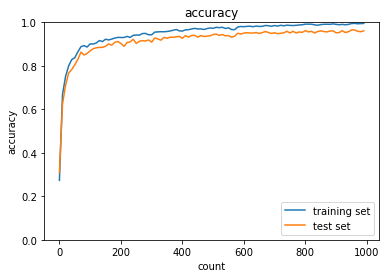

In [28]:
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

print("データ読み込み完了")

# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:5000], d_train[:5000]
x_test, d_test = x_test[:1000], d_test[:1000]


network = SimpleConvNet(input_dim=(1,28,28), conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

In [30]:
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt

class DoubleConvNet:
    # conv - relu - conv - relu - pool - affine - relu - affine - softmax
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param_1={'filter_num':10, 'filter_size':7, 'pad':1, 'stride':1},
                 conv_param_2={'filter_num':20, 'filter_size':3, 'pad':1, 'stride':1},
                 hidden_size=50, output_size=10, weight_init_std=0.01):
        conv_output_size_1 = (input_dim[1] - conv_param_1['filter_size'] + 2 * conv_param_1['pad']) / conv_param_1['stride'] + 1
        conv_output_size_2 = (conv_output_size_1 - conv_param_2['filter_size'] + 2 * conv_param_2['pad']) / conv_param_2['stride'] + 1        
        pool_output_size = int(conv_param_2['filter_num'] * (conv_output_size_2 / 2) * (conv_output_size_2 / 2))        
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(conv_param_1['filter_num'], input_dim[0], conv_param_1['filter_size'], conv_param_1['filter_size'])
        self.params['b1'] = np.zeros(conv_param_1['filter_num'])
        self.params['W2'] = weight_init_std * np.random.randn(conv_param_2['filter_num'], conv_param_1['filter_num'], conv_param_2['filter_size'], conv_param_2['filter_size'])
        self.params['b2'] = np.zeros(conv_param_2['filter_num'])
        self.params['W3'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b3'] = np.zeros(hidden_size)
        self.params['W4'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b4'] = np.zeros(output_size)
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param_1['stride'], conv_param_1['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Conv2'] = layers.Convolution(self.params['W2'], self.params['b2'], conv_param_2['stride'], conv_param_2['pad'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W3'], self.params['b3'])
        self.layers['Relu3'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W4'], self.params['b4'])
        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        
        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Conv2'].dW, self.layers['Conv2'].db        
        grad['W3'], grad['b3'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W4'], grad['b4'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.174
                : 10. 正答率(テスト) = 0.15
Generation: 20. 正答率(トレーニング) = 0.3758
                : 20. 正答率(テスト) = 0.342
Generation: 30. 正答率(トレーニング) = 0.6722
                : 30. 正答率(テスト) = 0.642
Generation: 40. 正答率(トレーニング) = 0.7508
                : 40. 正答率(テスト) = 0.728
Generation: 50. 正答率(トレーニング) = 0.79
                : 50. 正答率(テスト) = 0.769
Generation: 60. 正答率(トレーニング) = 0.8204
                : 60. 正答率(テスト) = 0.785
Generation: 70. 正答率(トレーニング) = 0.8388
                : 70. 正答率(テスト) = 0.797
Generation: 80. 正答率(トレーニング) = 0.8456
                : 80. 正答率(テスト) = 0.824
Generation: 90. 正答率(トレーニング) = 0.8414
                : 90. 正答率(テスト) = 0.815
Generation: 100. 正答率(トレーニング) = 0.864
                : 100. 正答率(テスト) = 0.82


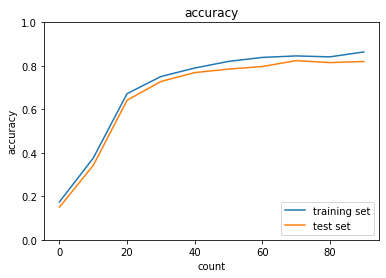

In [31]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

print("データ読み込み完了")
# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:5000], d_train[:5000]
x_test, d_test = x_test[:1000], d_test[:1000]


network = DoubleConvNet(input_dim=(1,28,28), 
                          conv_param_1={'filter_num':10, 'filter_size':7, 'pad':1, 'stride':1},
                          conv_param_2={'filter_num':20, 'filter_size':3, 'pad':1, 'stride':1},
                          hidden_size=100, output_size=10, weight_init_std=0.01)

optimizer = optimizer.Adam()

# 時間がかかるため100に設定
iters_num = 100
# iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

In [34]:
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common import optimizer

class DeepConvNet:
    '''
    認識率99%以上の高精度なConvNet

    conv - relu - conv- relu - pool -
    conv - relu - conv- relu - pool -
    conv - relu - conv- relu - pool -
    affine - relu - dropout - affine - dropout - softmax
    '''
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param_1 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_2 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_3 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_4 = {'filter_num':32, 'filter_size':3, 'pad':2, 'stride':1},
                 conv_param_5 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_6 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 hidden_size=50, output_size=10):
        # 重みの初期化===========
        # 各層のニューロンひとつあたりが、前層のニューロンといくつのつながりがあるか
        pre_node_nums = np.array([1*3*3, 16*3*3, 16*3*3, 32*3*3, 32*3*3, 64*3*3, 64*4*4, hidden_size])
        wight_init_scales = np.sqrt(2.0 / pre_node_nums)  # Heの初期値
        
        self.params = {}
        pre_channel_num = input_dim[0]
        for idx, conv_param in enumerate([conv_param_1, conv_param_2, conv_param_3, conv_param_4, conv_param_5, conv_param_6]):
            self.params['W' + str(idx+1)] = wight_init_scales[idx] * np.random.randn(conv_param['filter_num'], pre_channel_num, conv_param['filter_size'], conv_param['filter_size'])
            self.params['b' + str(idx+1)] = np.zeros(conv_param['filter_num'])
            pre_channel_num = conv_param['filter_num']
        self.params['W7'] = wight_init_scales[6] * np.random.randn(pre_node_nums[6], hidden_size)
        print(self.params['W7'].shape)
        self.params['b7'] = np.zeros(hidden_size)
        self.params['W8'] = wight_init_scales[7] * np.random.randn(pre_node_nums[7], output_size)
        self.params['b8'] = np.zeros(output_size)

        # レイヤの生成===========
        self.layers = []
        self.layers.append(layers.Convolution(self.params['W1'], self.params['b1'], 
                           conv_param_1['stride'], conv_param_1['pad']))
        self.layers.append(layers.Relu())
        self.layers.append(layers.Convolution(self.params['W2'], self.params['b2'], 
                           conv_param_2['stride'], conv_param_2['pad']))
        self.layers.append(layers.Relu())
        self.layers.append(layers.Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(layers.Convolution(self.params['W3'], self.params['b3'], 
                           conv_param_3['stride'], conv_param_3['pad']))
        self.layers.append(layers.Relu())
        self.layers.append(layers.Convolution(self.params['W4'], self.params['b4'],
                           conv_param_4['stride'], conv_param_4['pad']))
        self.layers.append(layers.Relu())
        self.layers.append(layers.Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(layers.Convolution(self.params['W5'], self.params['b5'],
                           conv_param_5['stride'], conv_param_5['pad']))
        self.layers.append(layers.Relu())
        self.layers.append(layers.Convolution(self.params['W6'], self.params['b6'],
                           conv_param_6['stride'], conv_param_6['pad']))
        self.layers.append(layers.Relu())
        self.layers.append(layers.Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(layers.Affine(self.params['W7'], self.params['b7']))
        self.layers.append(layers.Relu())
        self.layers.append(layers.Dropout(0.5))
        self.layers.append(layers.Affine(self.params['W8'], self.params['b8']))
        self.layers.append(layers.Dropout(0.5))
        
        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x, train_flg=False):
        for layer in self.layers:
            if isinstance(layer, layers.Dropout):
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)
        return x

    def loss(self, x, d):
        y = self.predict(x, train_flg=True)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx, train_flg=False)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td)

        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        tmp_layers = self.layers.copy()
        tmp_layers.reverse()
        for layer in tmp_layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            grads['W' + str(i+1)] = self.layers[layer_idx].dW
            grads['b' + str(i+1)] = self.layers[layer_idx].db

        return grads

データ読み込み完了
(1024, 50)
Generation: 10. 正答率(トレーニング) = 0.3472
                : 10. 正答率(テスト) = 0.282
Generation: 20. 正答率(トレーニング) = 0.607
                : 20. 正答率(テスト) = 0.541
Generation: 30. 正答率(トレーニング) = 0.7386
                : 30. 正答率(テスト) = 0.68
Generation: 40. 正答率(トレーニング) = 0.775
                : 40. 正答率(テスト) = 0.727
Generation: 50. 正答率(トレーニング) = 0.8164
                : 50. 正答率(テスト) = 0.782
Generation: 60. 正答率(トレーニング) = 0.8566
                : 60. 正答率(テスト) = 0.83
Generation: 70. 正答率(トレーニング) = 0.8898
                : 70. 正答率(テスト) = 0.858
Generation: 80. 正答率(トレーニング) = 0.8932
                : 80. 正答率(テスト) = 0.858
Generation: 90. 正答率(トレーニング) = 0.9016
                : 90. 正答率(テスト) = 0.882
Generation: 100. 正答率(トレーニング) = 0.9232
                : 100. 正答率(テスト) = 0.911


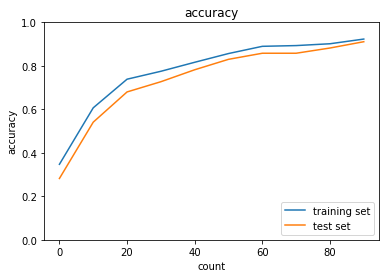

In [35]:
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:5000], d_train[:5000]
x_test, d_test = x_test[:1000], d_test[:1000]

print("データ読み込み完了")

network = DeepConvNet()  
optimizer = optimizer.Adam()

iters_num = 100
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 確認テスト

サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドとパディングは1とする。

$ OH = \frac{6+2-2}{1}+1 = 7 $  

$ OW = \frac{6+2-2}{1}+1 = 7 $

出力画像サイズは(7,7)

# ラビットチャレンジ/深層学習day2/# Section5:最新のCNN
## 100文字以上の要点まとめ

・AlexNet

過学習を防ぐ施策
・サイズ4096の全結合層の出力にドロップアウトを使用している。

AlexNet(Krizhevsky et al., 2012) は、Hinton 教授らのチームによって発表された物体認識のためのモデル（アーキテクチャ）である。AlexNetが、物体認識のために、初めて深層学習の概念および畳み込みニューラルネットワークの概念を取り入れたアーキテクチャである。当時の画像分類チャレンジコンテスト（ILSVRC）において、AlexNetが飛躍的な性能を果たした。

2012年以前には画像分類チャレンジコンテストにおいて、画像から特徴量を抽出し、その特徴量を用いて画像の分類を行なっていた。当時、画像から特徴量を抽出する際に、人が、物体の色・輝度・形など特徴量を設計していた。そのため、いかに有効な特徴量を設計できることが、画像分類の性能を左右していた。それが、2012年に、人が特徴量を設計しなくても、十分なデータさえ存在すれば、機械自身が特徴量を見つけ出すことが AlexNet によってで示された。

AlexNetは、次の図 (Figure 2, Krizhevsky et al., 2012)のように3つの畳み込み層（convolutional layer）、2つのプーリング層（pooling layer）および 3つの全結合層（fully connected layer）から構成されている。入力画像は 224 × 224 サイズの正方形であり、出力は1,000個の要素を持つ1次元のベクトルであり、それぞれ1,000個の分類クラスを表している。また、AlexNetでは、次図のように、1枚の正方形の画像を上下半分に分けて、上半分と下半分をそれぞれ2つのGPUで学習を進めて、最後の全結合層で結合させている。

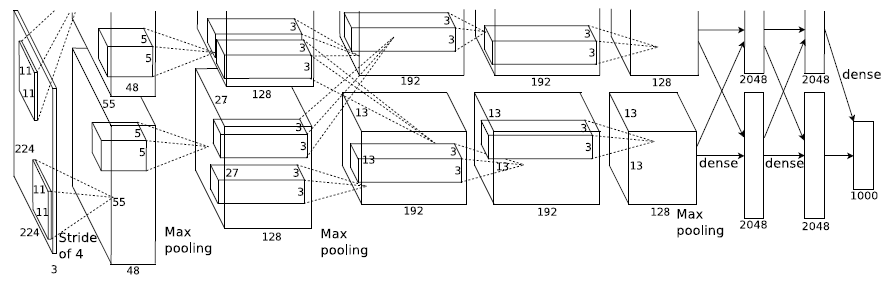